In [1]:
import pandas_datareader as pdr
key="e06cf9803b45bdb509b4ebb742fdfdac667ee869"

In [ ]:
df = pdr.get_data_tiingo('APPL', api_key=key)

In [ ]:
df.to_csv('APPL.csv')

In [3]:
import pandas as pd
df=pd.read_csv('/content/AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1=df.reset_index()['high']

In [6]:
df1

,high
0,132.260
1,131.950
2,131.450
3,131.390
4,130.655
...,...
1253,316.500
1254,318.520
1255,319.520
1256,320.890


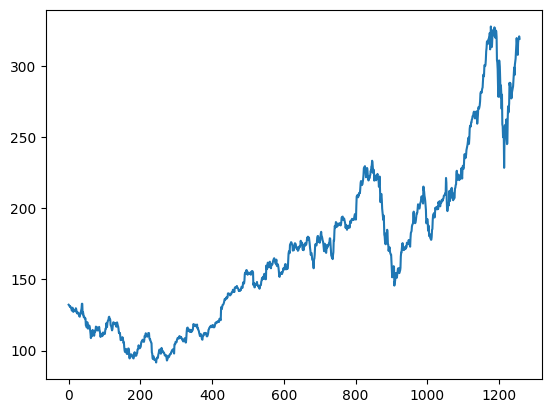

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.17186045]
 [0.17054789]
 [0.16843086]
 ...
 [0.96473029]
 [0.97053095]
 [0.96350241]]


In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(880, 378)

In [12]:
train_data

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       [0.16817681],
       [0.16506478],
       [0.16627149],
       [0.16474723],
       [0.16097891],
       [0.15894657],
       [0.15416208],
       [0.15949699],
       [0.1630536 ],
       [0.15522059],
       [0.15060547],
       [0.15318825],
       [0.15331527],
       [0.15513591],
       [0.15306122],
       [0.1540774 ],
       [0.15217207],
       [0.16144466],
       [0.15890423],
       [0.15378101],
       [0.14734525],
       [0.14586332],
       [0.14933525],
       [0.14827674],
       [0.14632907],
       [0.14599035],
       [0.13959692],
       [0.13714116],
       [0.13625201],
       [0.14431789],
       [0.14692184],
       [0.15022441],
       [0.15623677],
       [0.16068253],
       [0.17486663],
       [0.17465492],
       [0.14323821],
       [0.14997036],
       [0.14425438],
       [0.13523584],
       [0.13650605],
       [0.13477009],
       [0.13083199],
       [0.13113939],
       [0.130

In [13]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
X_train = {}
y_train = {}
X_test = {}
ytest = {}
time_step_sizes = [100, 125 , 150]
# Use zip to iterate over both lists simultaneously
for i, j  in zip(time_step_sizes , [0, 1, 2]):
  X_train[j], y_train[j] = create_dataset(train_data, i)
  X_test[j], ytest[j] = create_dataset(test_data, i)

In [15]:
print(X_train[0].shape), print(y_train[0].shape)

(779, 100)
(779,)


(None, None)

In [16]:
for i in range(3):
  X_train[i] =X_train[i].reshape(X_train[i].shape[0],X_train[i].shape[1] , 1)
  X_test[i] = X_test[i].reshape(X_test[i].shape[0],X_test[i].shape[1] , 1)


In [17]:
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.0


In [22]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras_tuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import mean_squared_error

<ipython-input-23-7fe2e3dbfd14>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


In [24]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units1', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(100,1)
    ))
    model.add(LSTM(
        units=hp.Int('units2', min_value=32, max_value=128, step=16),
        return_sequences=True
    ))
    model.add(LSTM(
        units=hp.Int('units3', min_value=32, max_value=128, step=16)
    ))
    model.add(Dense(1))
    model.compile(
        loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        )
    )
    return model

In [33]:
tuner_result = {}
model = {}
for step, i  in zip(time_step_sizes , [0, 1, 2]):
    print(f'Tuning model for time_step = {step}')
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=5,
        executions_per_trial=1,
        directory='tuner_logs',
        project_name=f'time_step_{step}'
    )
    tuner.search(X_train[i], y_train[i], epochs=20, validation_data=(X_test[i], ytest[i]), verbose=0)
    model[i] = tuner.get_best_models(num_models=1)[0]

Tuning model for time_step = 100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Tuning model for time_step = 125
Tuning model for time_step = 150


In [34]:
for i in range(3):
  model[i].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 48)        │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 112)       │        72,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,321 (391.88 KB)

 Trainable params: 100,321 (391.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 112)       │        51,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 96)        │        80,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 80)             │        56,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,049 (734.57 KB)

 Trainable params: 188,049 (734.57 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 48)        │        21,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 112)            │        72,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,833 (432.94 KB)

 Trainable params: 110,833 (432.94 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
for i in range(3):
  model[i].fit(X_train[i], y_train[i], epochs=100, batch_size=32, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0183
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3677e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.5792e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8286e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.4024e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.1949e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9016e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3675e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6863e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7944e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7164e-04
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8866e-04
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8156e-04
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5976e-04
Epoch

In [37]:
from sklearn.metrics import mean_squared_error
import math
for i in range(3):
    train_pred = model[i].predict(X_train[i])
    test_pred = model[i].predict(X_test[i])

    # 2. Inverse transform
    train_pred_inv = scaler.inverse_transform(train_pred)
    test_pred_inv = scaler.inverse_transform(test_pred)

    # 3. Calculate RMSE
    train_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_train[i].reshape(-1, 1)), train_pred_inv))
    test_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(ytest[i].reshape(-1, 1)), test_pred_inv))
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Train RMSE: 3.17
Test RMSE: 8.10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Train RMSE: 2.00
Test RMSE: 10.03
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Train RMSE: 2.11
Test RMSE: 7.21


as we seen here the rmse value for the time_sep=150 is low for both Train and Test data , instead the RMSE value of train data is low in the time_step=125 but for Test data its high this is the sign of overfitting but the erro is not that much high

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


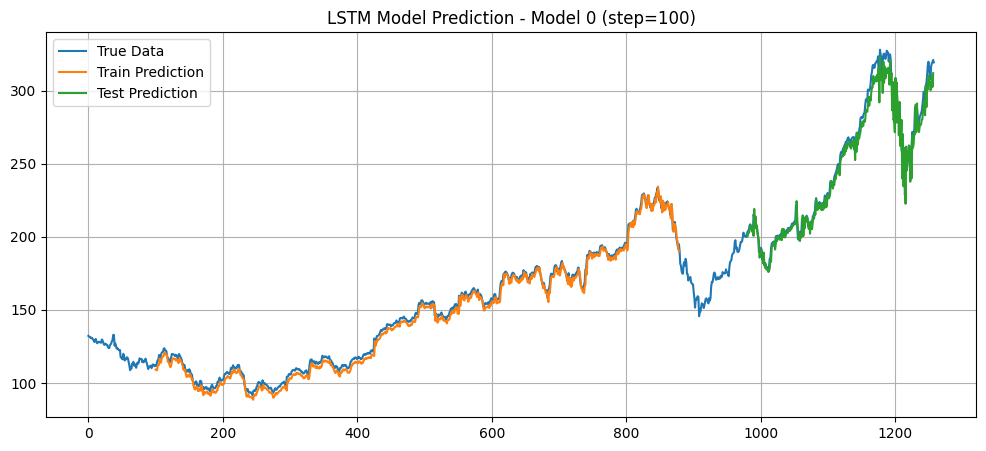

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


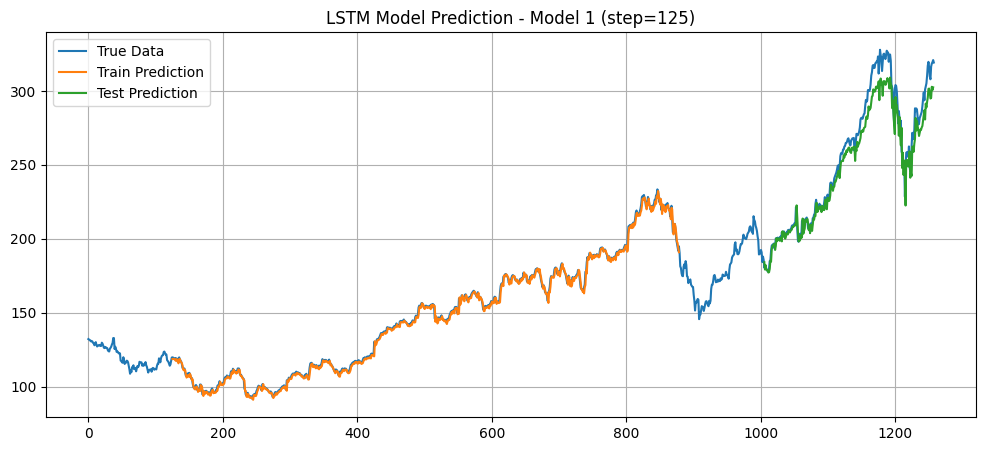

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


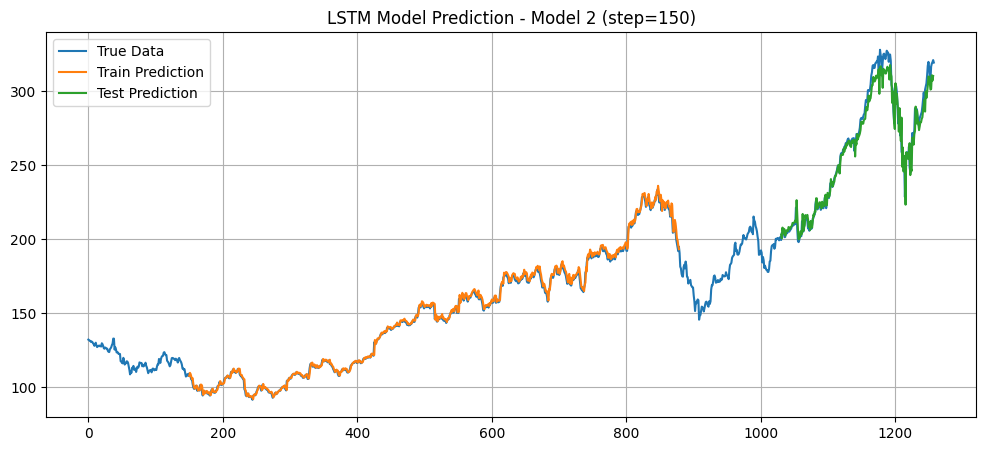

In [39]:

for i in range(len(time_step_sizes)):
  step = time_step_sizes[i]


  train_pred = model[i].predict(X_train[i])
  test_pred = model[i].predict(X_test[i])

  train_pred_inv = scaler.inverse_transform(train_pred)
  test_pred_inv = scaler.inverse_transform(test_pred)

  df_plot = np.copy(df1)
  train_plot = np.empty_like(df_plot)
  train_plot[:, :] = np.nan

  # train_plot starts after the 'step' lag
  train_plot[step : len(train_pred_inv) + step, :] = train_pred_inv

  test_plot = np.empty_like(df_plot)
  test_plot[:, :] = np.nan


  test_plot_start_index = len(train_data) + step
  test_plot[test_plot_start_index : test_plot_start_index + len(test_pred_inv), :] = test_pred_inv


  plt.figure(figsize=(12, 5))
  plt.title(f'LSTM Model Prediction - Model {i} (step={step})')
  plt.plot(scaler.inverse_transform(df1), label='True Data')
  plt.plot(train_plot, label='Train Prediction')
  plt.plot(test_plot, label='Test Prediction')
  plt.legend()
  plt.grid()
  plt.show()

In [41]:
from numpy import array
lst_output_dic={}
for j in range(3):
  step=time_step_sizes[j]
  temp_input=list(test_data[-step:].reshape(1,-1))
  temp_input=temp_input[0].tolist()
  lst_output=[]
  n_steps=step
  i=0
  while(i<60):

    if(len(temp_input)>step):

        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model[j].predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps,1))

        yhat = model[j].predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    lst_output_dic[j]=lst_output

In [42]:
print(lst_output_dic[2])

[[0.9212961792945862], [0.8751824498176575], [0.8445889353752136], [0.8219491243362427], [0.8014274835586548], [0.7816516757011414], [0.7650182247161865], [0.752499520778656], [0.7429861426353455], [0.7351911067962646], [0.7287054657936096], [0.7235849499702454], [0.7196996808052063], [0.7166564464569092], [0.7140828967094421], [0.7117964625358582], [0.7097408175468445], [0.7078689932823181], [0.7061120867729187], [0.7044158577919006], [0.7027643918991089], [0.7011670470237732], [0.699635922908783], [0.6981764435768127], [0.6967921853065491], [0.6954889893531799], [0.6942729949951172], [0.6931476593017578], [0.6921128034591675], [0.6911655068397522], [0.6903015971183777], [0.6895164847373962], [0.6888046264648438], [0.6881600022315979], [0.6875761151313782], [0.6870470643043518], [0.686566948890686], [0.6861306428909302], [0.6857336163520813], [0.6853715181350708], [0.6850407719612122], [0.6847380995750427], [0.6844606995582581], [0.6842061877250671], [0.6839727163314819], [0.683758020

In [43]:
len(df1)

1258

pridction plot for the time_step 100


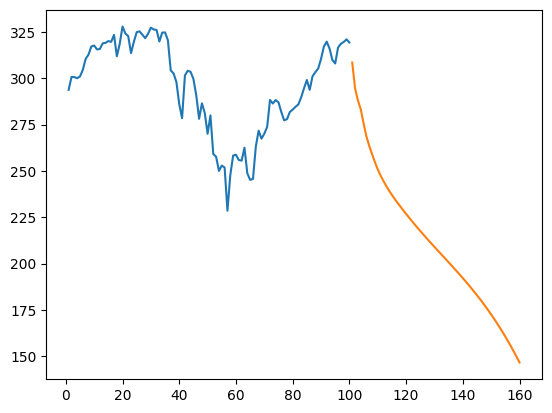

pridction plot for the time_step 125


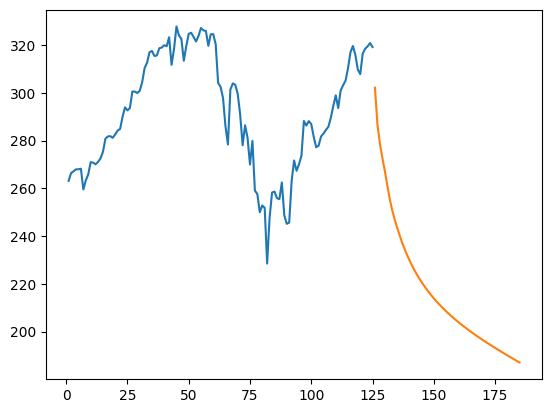

pridction plot for the time_step 150


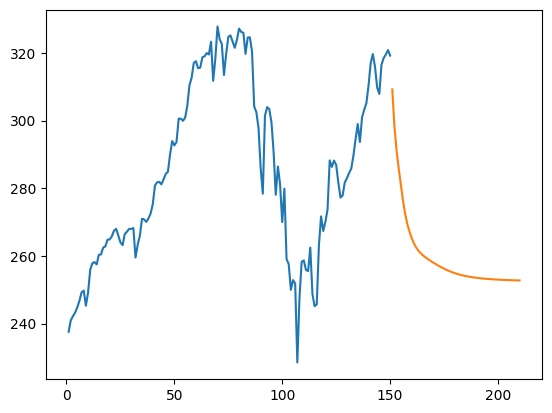

In [46]:
for i in range(3):
  step=time_step_sizes[i]
  day_new=np.arange(1,step+1)
  day_predict=np.arange(step+1,step+61)
  print(f'pridction plot for the time_step {step}')
  plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-step:]))
  plt.plot(day_predict,scaler.inverse_transform(lst_output_dic[i]))
  plt.show()

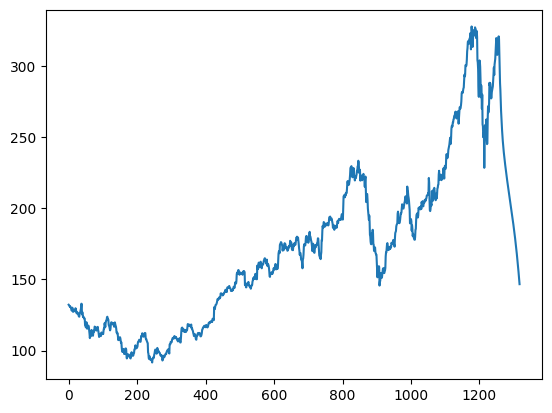

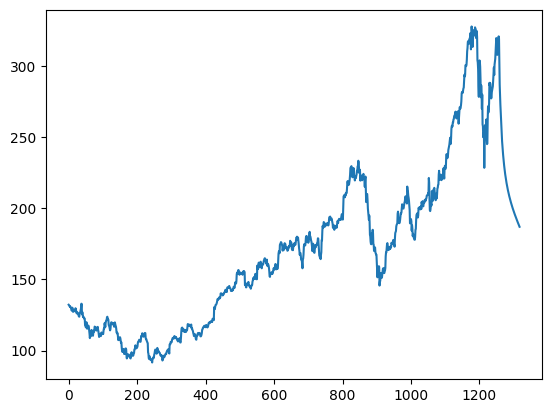

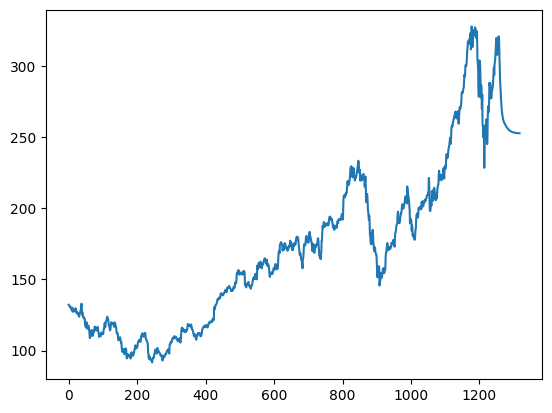

In [47]:
for i in range(3):
  data=df1.tolist()
  data.extend(lst_output_dic[i])
  data=scaler.inverse_transform(data).tolist()
  plt.plot(data)
  plt.show()